In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
ticker = 'AAPL'
start_date ="2020-01-01"
data = yf.download(ticker, start=start_date)
print(f"Successfully downloaded stock data for {ticker} from {start_date} to present!")
data.head()

/tmp/ipython-input-9-3937056709.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date)
[*********************100%***********************]  1 of 1 completed


Successfully downloaded stock data for AAPL from 2020-01-01 to present!


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


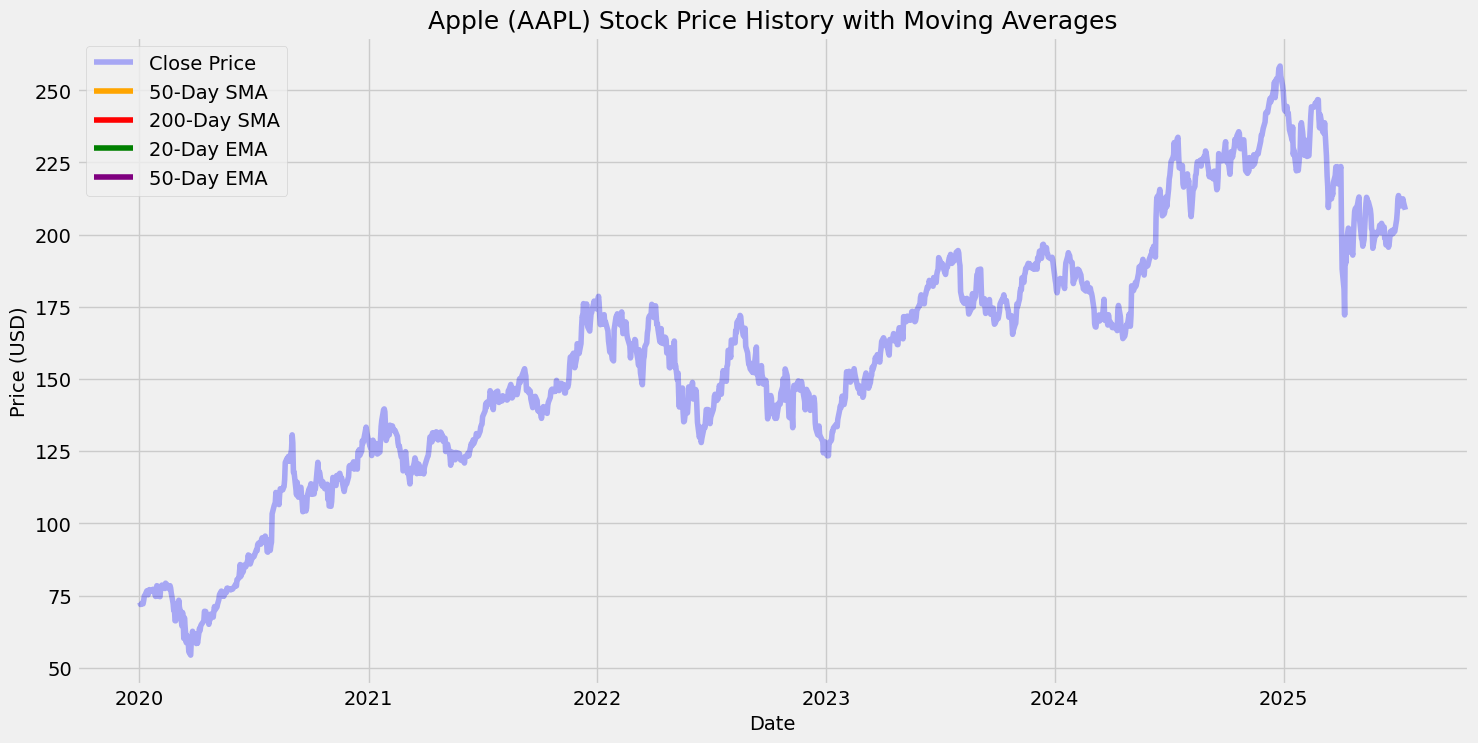

In [23]:
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()
data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.3)
plt.plot(data['SMA50'], label='50-Day SMA', color='orange')
plt.plot(data['SMA200'], label='200-Day SMA', color='red')
plt.plot(data['EMA20'],  label='20-Day EMA', color='green')
plt.plot(data['EMA50'],  label='50-Day EMA', color='purple')
plt.title('Apple (AAPL) Stock Price History with Moving Averages', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc= 'upper left')
plt.grid(True)
plt.show()

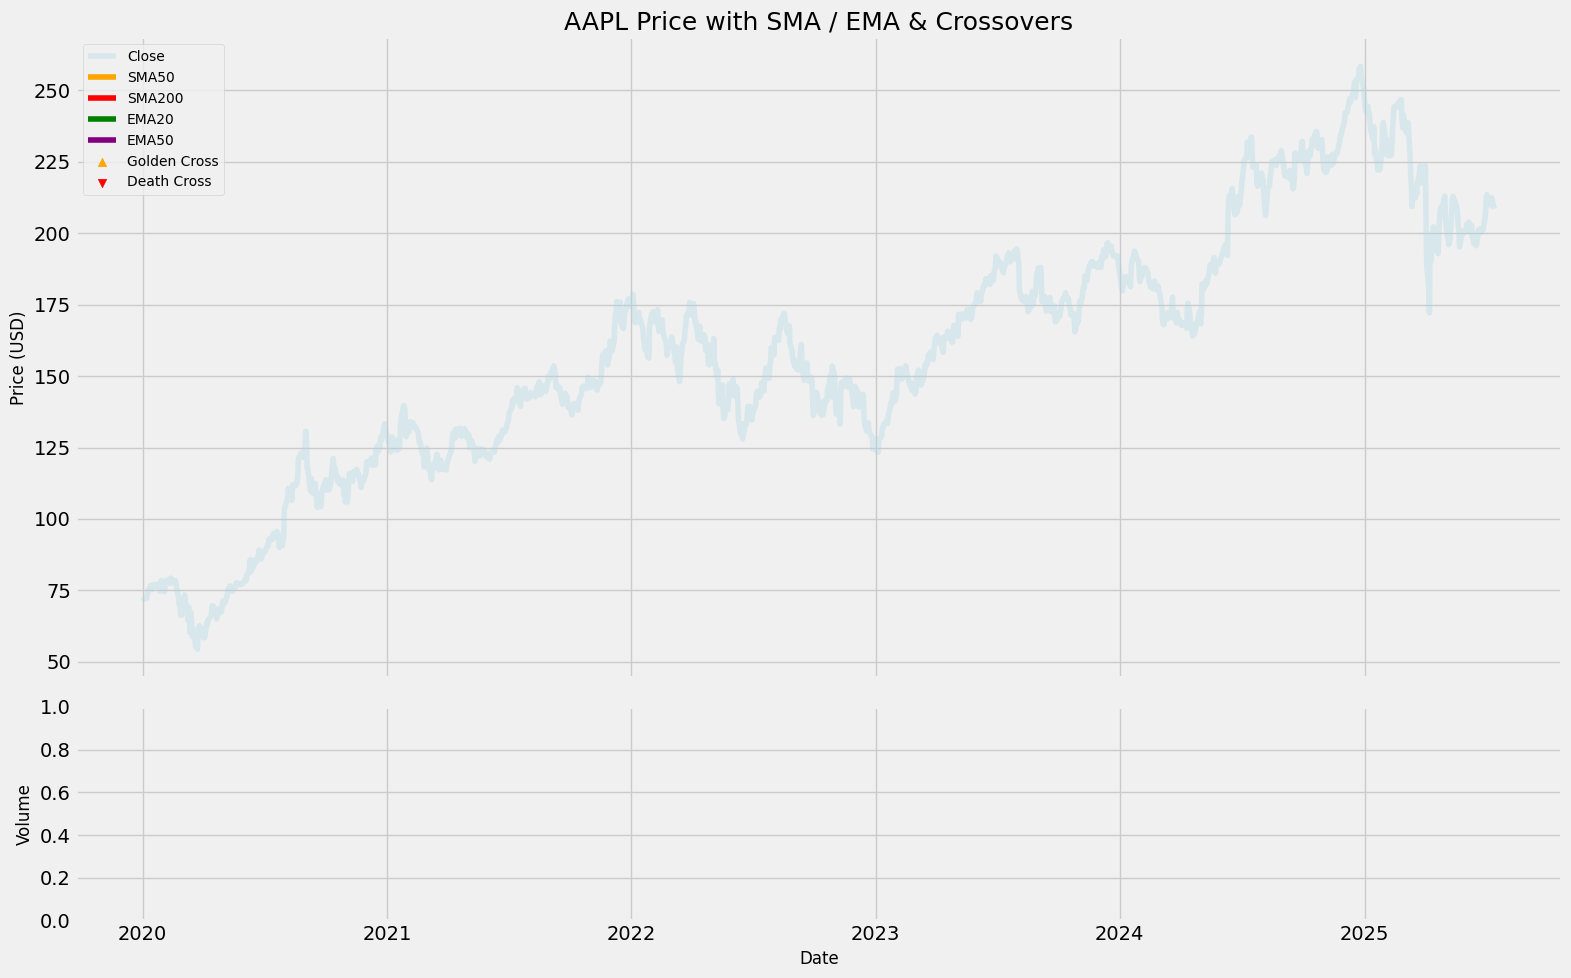

In [39]:
# =============== 预先计算指标 ===============
# 如果之前已计算过，可跳过
data['SMA50']  = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()
data['EMA20']  = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA50']  = data['Close'].ewm(span=50, adjust=False).mean()

# 金叉 / 死叉布尔序列
golden_cross = (
    (data['EMA20'].shift(1) < data['EMA50'].shift(1)) &
    (data['EMA20'] >= data['EMA50'])
)

death_cross  = (
    (data['EMA20'].shift(1) > data['EMA50'].shift(1)) &
    (data['EMA20'] <= data['EMA50'])
)

# =============== 画双子图 ===============
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(16, 10),
    sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}  # 上:价格  下:成交量
)

# ----- ax1 价格 & 均线 -----
ax1.plot(data['Close'],  label='Close',   color='lightblue', alpha=0.35)
ax1.plot(data['SMA50'],  label='SMA50',   color='orange')
ax1.plot(data['SMA200'], label='SMA200',  color='red')
ax1.plot(data['EMA20'],  label='EMA20',   color='green')
ax1.plot(data['EMA50'],  label='EMA50',   color='purple')

# 金叉 / 死叉 标注
ax1.scatter(data[golden_cross].index,
            data[golden_cross]['Close'],
            marker='^', color='orange', label='Golden Cross', zorder=5)

ax1.scatter(data[death_cross].index,
            data[death_cross]['Close'],
            marker='v', color='red',    label='Death Cross',  zorder=5)

ax1.set_title('AAPL Price with SMA / EMA & Crossovers', fontsize=18)
ax1.set_ylabel('Price (USD)', fontsize=12)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True)

# ----- ax2 成交量 -----
ax2.set_ylabel('Volume', fontsize=12)
ax2.grid(True)

# ----- 收尾 -----
plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()